# **California Housing Price Prediction**

**Data:** `data_california_house.csv`

### **Daftar Isi (Contents)**

1. Pemahaman Masalah Bisnis (Business Problem Understanding)
2. Pemahaman Data (Data Understanding)
3. Pembersihan Data (Data Preprocessing)
4. Pemodelan (Modeling)
5. Kesimpulan (Conclusion)
6. Rekomendasi (Recommendation)


### **1. Pemahaman Masalah Bisnis (Business Problem Understanding)**

**Latar Belakang (Context)**

Pasar perumahan di California sangat dinamis dan dipengaruhi oleh berbagai faktor, mulai dari lokasi geografis (garis lintang dan bujur), kedekatan dengan pantai, hingga kondisi demografi seperti populasi dan pendapatan rata-rata penduduk di suatu area. Informasi mengenai harga rumah yang akurat sangat penting bagi berbagai pihak, termasuk agen real estate yang ingin menentukan harga jual yang kompetitif, investor yang mencari area potensial, maupun pemerintah yang memerlukan data untuk perencanaan kota dan perpajakan.

Kumpulan data ini mencakup metrik seperti populasi, pendapatan median, dan harga rumah median untuk setiap grup blok di California. Grup blok adalah unit geografis terkecil yang datanya dipublikasikan oleh Biro Sensus AS (biasanya memiliki populasi 600 hingga 3.000 orang).

**Pernyataan Masalah (Problem Statement)**

Menentukan nilai pasar yang wajar untuk sebuah properti adalah tantangan yang kompleks. Metode penaksiran manual seringkali subjektif dan memakan waktu. Tanpa model prediksi yang akurat, stakeholder berisiko salah dalam menilai harga aset—penjual bisa merugi karena menjual terlalu murah, atau properti tidak laku karena dijual terlalu mahal. Selain itu, fluktuasi harga berdasarkan lokasi dan fitur properti sulit dilacak tanpa analisis data yang komprehensif.

Oleh karena itu, diperlukan model *machine learning* yang dapat mempelajari pola dari data historis untuk memprediksi harga rumah median di suatu wilayah.

**Tujuan (Goals)**

Tujuan utama dari proyek ini adalah membangun model regresi yang mampu memprediksi **`median_house_value`** (harga rumah median) seakurat mungkin berdasarkan fitur-fitur yang tersedia dalam dataset. Model ini diharapkan dapat:
1.  Memberikan estimasi harga rumah yang dapat diandalkan.
2.  Mengidentifikasi faktor-faktor kunci yang paling mempengaruhi harga rumah di California.

**Pendekatan Analisis (Analytic Approach)**

Pendekatan yang akan dilakukan meliputi:
1.  **Exploratory Data Analysis (EDA):** Menganalisis distribusi data, korelasi antar fitur, dan mendeteksi outlier atau *missing values*.
2.  **Data Preprocessing:** Membersihkan data, menangani *missing values*, dan melakukan *feature engineering* jika diperlukan.
3.  **Modeling:** Melatih beberapa algoritma regresi (seperti Linear Regression, Decision Tree, Random Forest, atau XGBoost) untuk memprediksi harga.
4.  **Evaluasi:** Membandingkan performa model menggunakan metrik evaluasi yang relevan.

**Evaluasi Metrik (Metric Evaluation)**

Karena ini adalah masalah regresi, performa model akan dievaluasi menggunakan metrik berikut:
-   **RMSE (Root Mean Squared Error):** Mengukur akar rata-rata kuadrat kesalahan antara nilai prediksi dan nilai aktual. RMSE sangat berguna karena memberikan bobot lebih pada kesalahan besar.
-   **MAE (Mean Absolute Error):** Rata-rata selisih absolut antara prediksi dan aktual. Lebih mudah diinterpretasikan karena satuannya sama dengan target variabel.
-   **MAPE (Mean Absolute Percentage Error):** Rata-rata persentase kesalahan absolut. Berguna untuk melihat seberapa besar penyimpangan prediksi dalam persen.

### **2. Pemahaman Data (Data Understanding)**

Dataset ini berisi informasi sensus perumahan di California. Berikut adalah penjelasan untuk setiap kolom dalam dataset:

| Kolom | Deskripsi |
| :--- | :--- |
| `longitude` | Garis bujur geografis (lokasi timur-barat). |
| `latitude` | Garis lintang geografis (lokasi utara-selatan). |
| `housing_median_age` | Usia rata-rata rumah dalam suatu blok. |
| `total_rooms` | Total jumlah ruangan dalam satu blok. |
| `total_bedrooms` | Total jumlah kamar tidur dalam satu blok. |
| `population` | Total populasi yang tinggal dalam satu blok. |
| `households` | Total jumlah rumah tangga (sekelompok orang yang tinggal dalam satu unit rumah) dalam satu blok. |
| `median_income` | Pendapatan rata-rata rumah tangga dalam suatu blok (dalam puluhan ribu US Dollar). |
| `ocean_proximity` | Lokasi rumah relatif terhadap laut/samudra. |
| `median_house_value` | **Target Variable**. Nilai rata-rata rumah dalam suatu blok (dalam US Dollar). |

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('data_california_house.csv')

# Menampilkan 5 baris pertama data
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


In [74]:
# Mengecek informasi umum tentang dataset (tipe data, jumlah baris, dll)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [75]:
# Statistika deskriptif untuk kolom numerik
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [76]:
# Mengecek nilai unik pada kolom kategorikal 'ocean_proximity'
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
ISLAND           2
Name: count, dtype: int64

In [77]:
# Mengecek apakah ada missing values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [78]:
# Mengecek apakah ada data duplikat
df.duplicated().sum()

np.int64(0)

### **3. Exploratory Data Analysis (EDA)**
Tahap ini bertujuan untuk memahami karakteristik data secara lebih mendalam melalui visualisasi.

#### **a. Analisis Distribusi Data (Satu Variabel)**
Melihat penyebaran data pada setiap kolom satu per satu.

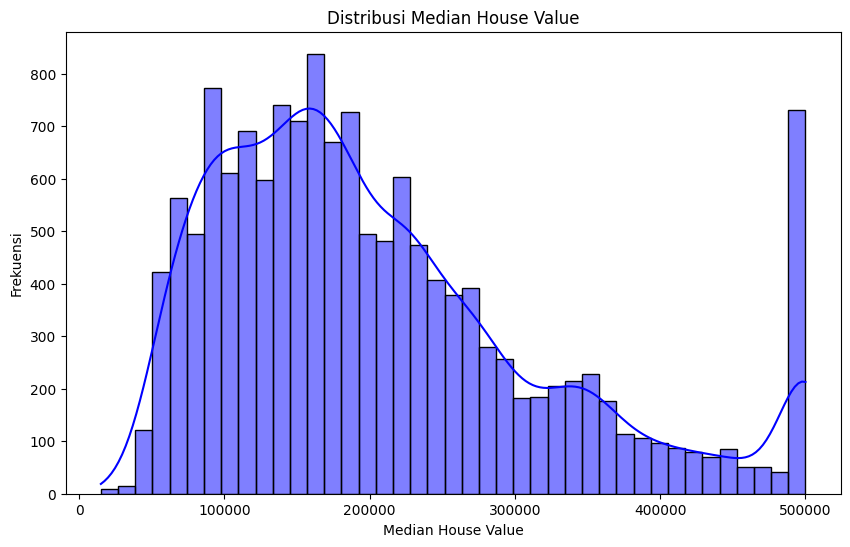

In [79]:
# Distribusi Target Variable (median_house_value)
plt.figure(figsize=(10, 6))
sns.histplot(df['median_house_value'], kde=True, color='blue')
plt.title('Distribusi Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frekuensi')
plt.show()

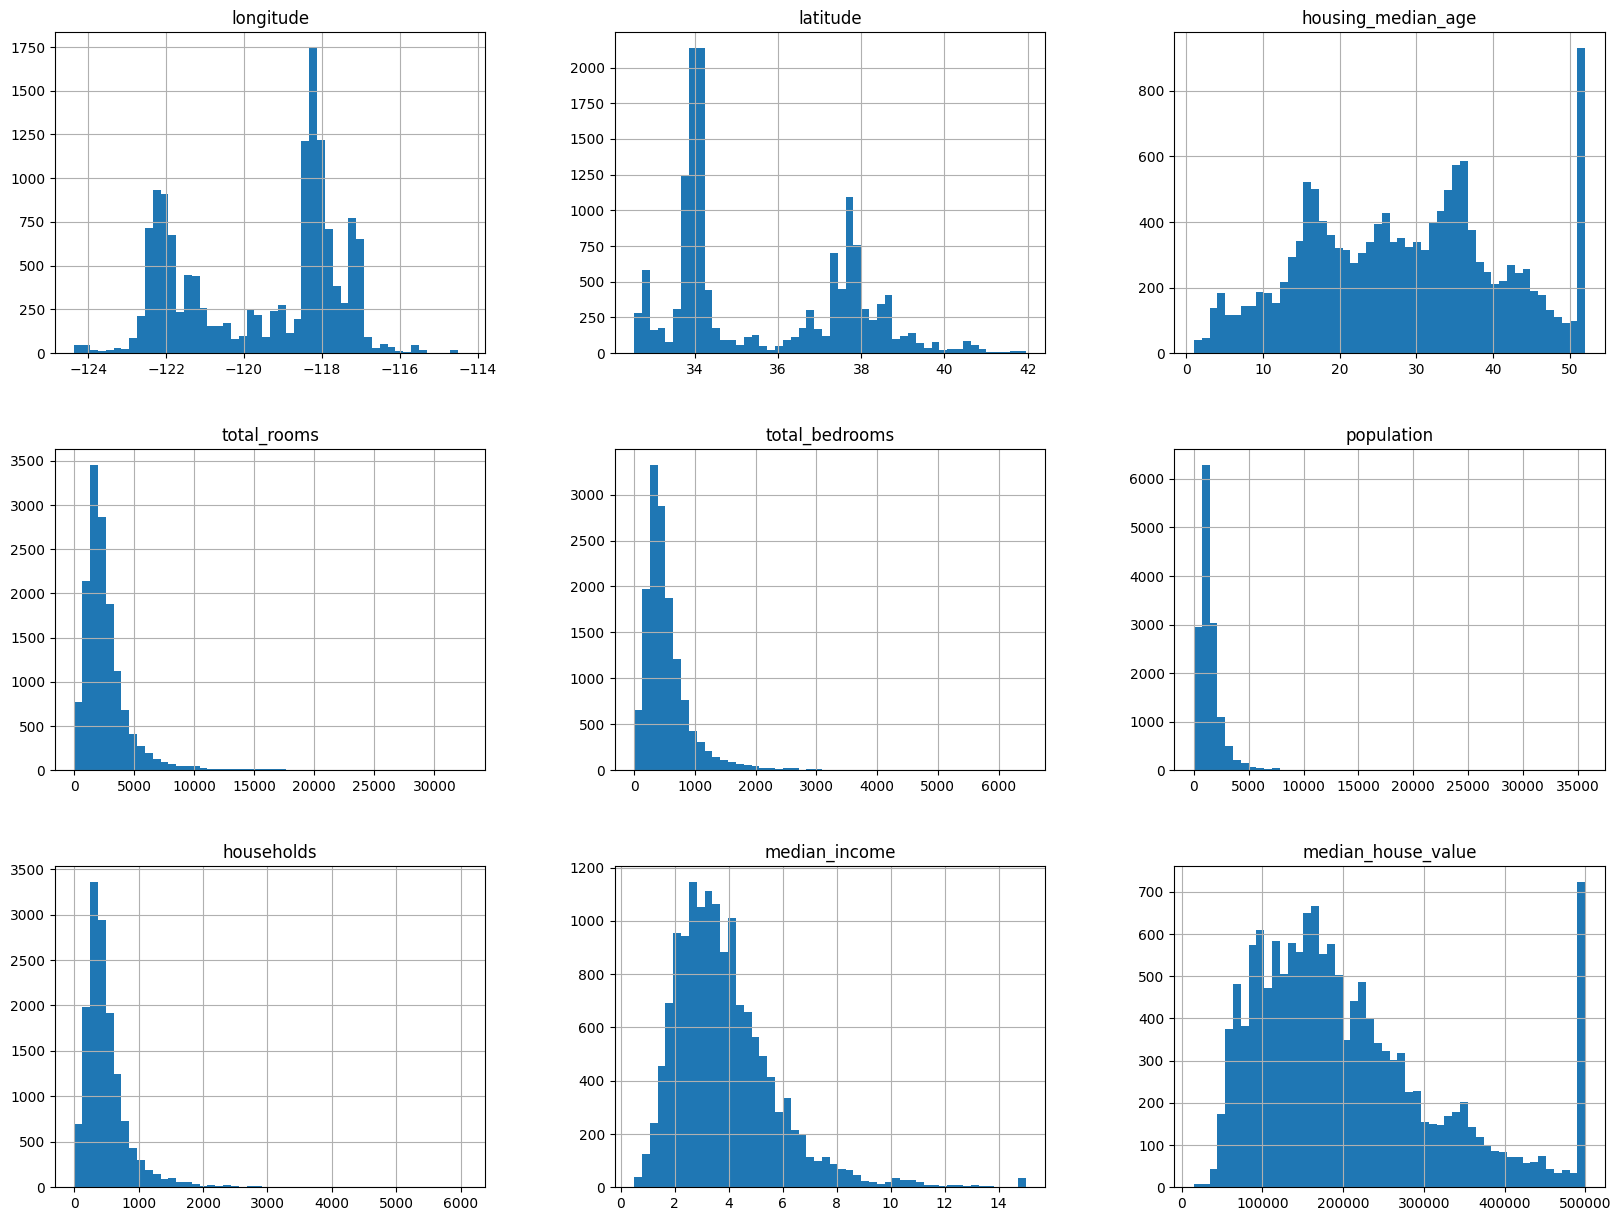

In [80]:
# Distribusi fitur numerik lainnya
df.hist(bins=50, figsize=(20, 15))
plt.show()

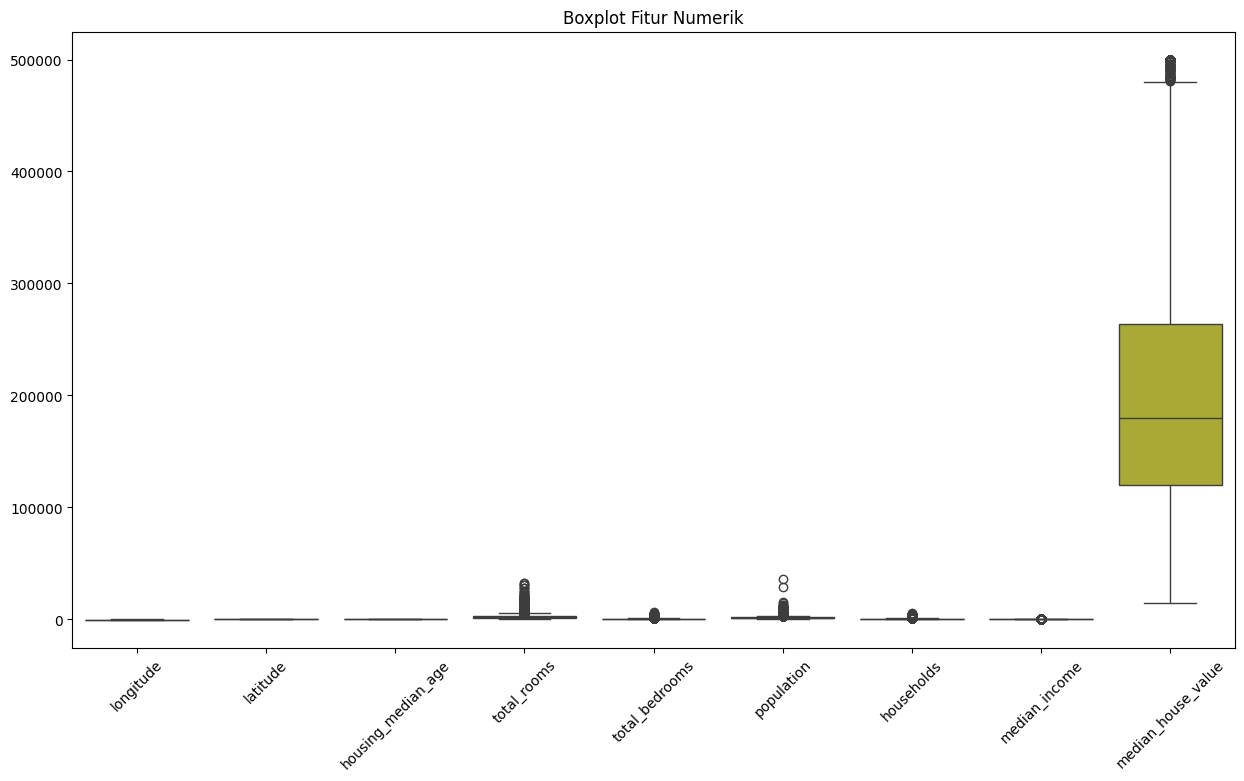

In [81]:
# Boxplot untuk mendeteksi outliers pada fitur-fitur penting
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.xticks(rotation=45)
plt.title('Boxplot Fitur Numerik')
plt.show()

#### **b. Analisis Hubungan Antar Data (Dua Variabel)**
Melihat hubungan antara dua kolom yang berbeda.

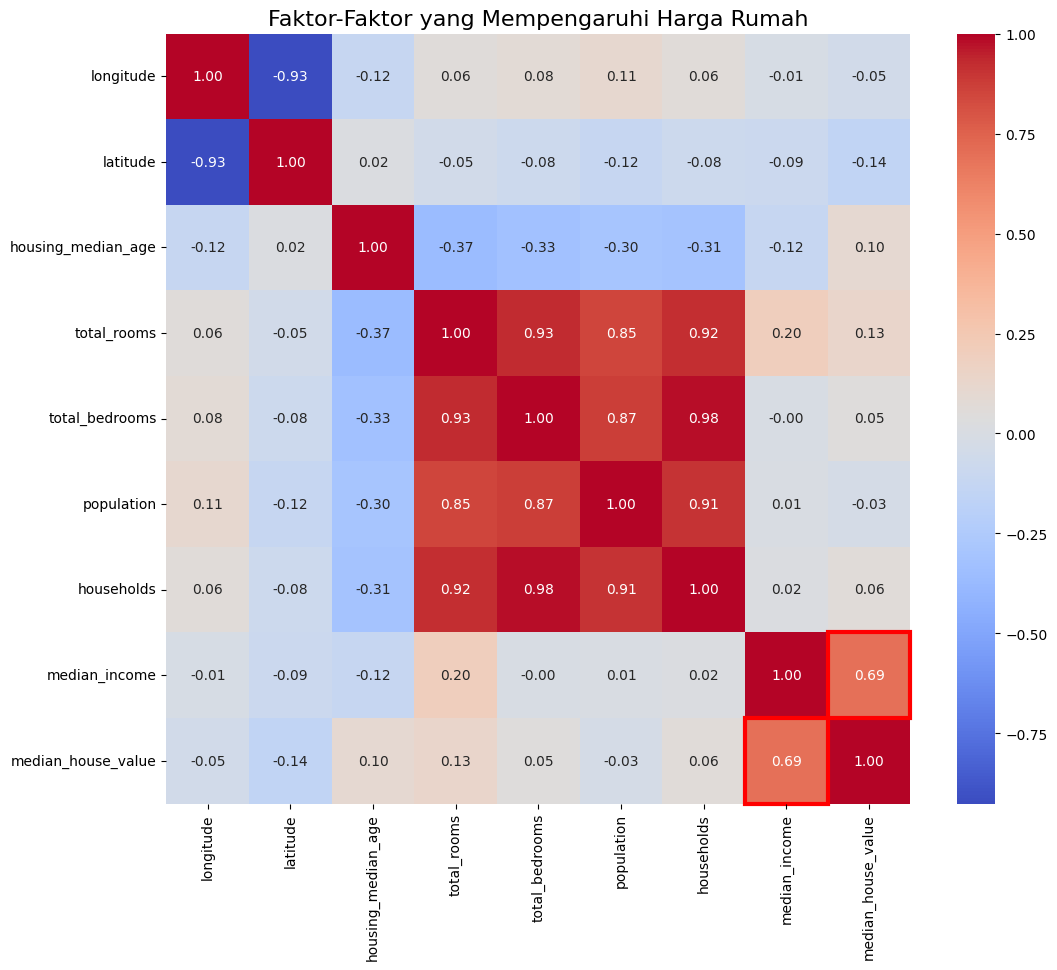

In [82]:
# Korelasi antar fitur numerik
plt.figure(figsize=(12, 10))
corr_matrix = df.corr(numeric_only=True)
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Faktor-Faktor yang Mempengaruhi Harga Rumah', fontsize=16)

# Highlight correlation between median_income and median_house_value
if 'median_income' in corr_matrix.columns and 'median_house_value' in corr_matrix.index:
    x_idx = list(corr_matrix.columns).index('median_income')
    y_idx = list(corr_matrix.index).index('median_house_value')
    
    from matplotlib.patches import Rectangle
    ax.add_patch(Rectangle((x_idx, y_idx), 1, 1, fill=False, edgecolor='red', lw=3, clip_on=False))
    ax.add_patch(Rectangle((y_idx, x_idx), 1, 1, fill=False, edgecolor='red', lw=3, clip_on=False))
plt.show()

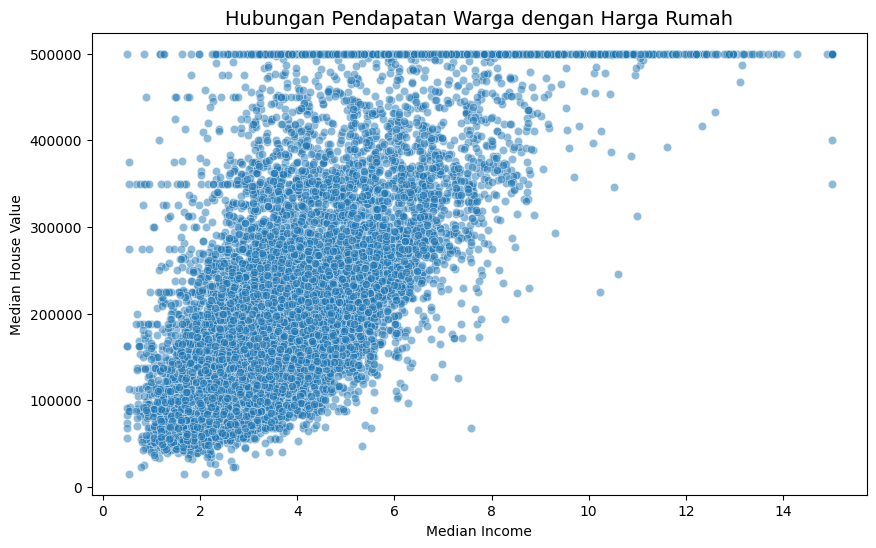

In [83]:
# Scatterplot antara Median Income dan Median House Value
# Fokus pada fitur dengan korelasi tertinggi dengan target
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=df, alpha=0.5)
plt.title('Hubungan Pendapatan Warga dengan Harga Rumah', fontsize=14)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

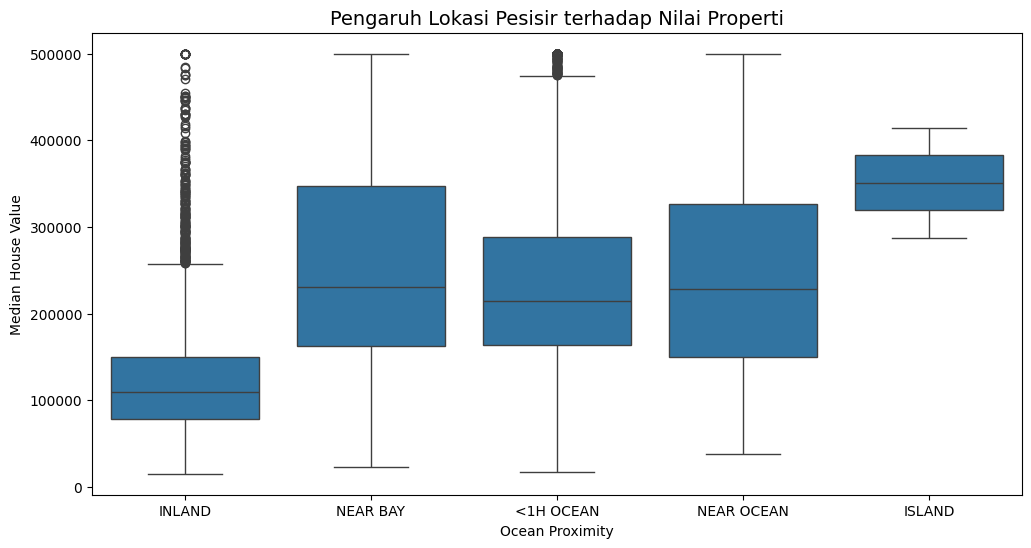

In [84]:
# Pengaruh Ocean Proximity terhadap Harga Rumah
plt.figure(figsize=(12, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)
plt.title('Pengaruh Lokasi Pesisir terhadap Nilai Properti', fontsize=14)
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()

#### **c. Geospatial Analysis**
Visualisasi data berdasarkan lokasi geografis.

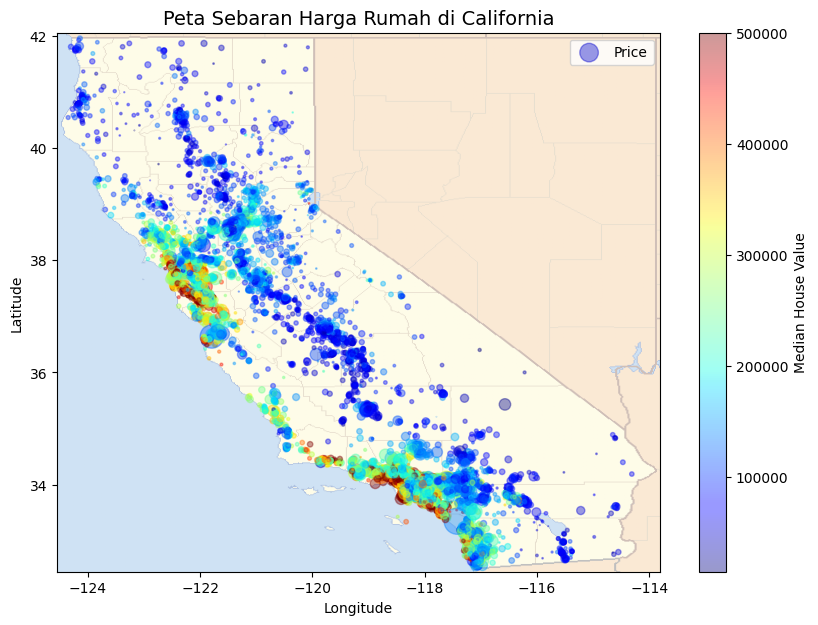

In [85]:
import matplotlib.image as mpimg

# Load the map image
california_img = mpimg.imread('california.png')

plt.figure(figsize=(10, 7))
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.scatter(x=df['longitude'], y=df['latitude'], alpha=0.4,
    c=df['median_house_value'], cmap=plt.get_cmap('jet'), label='Price', s=df['population']/100)

plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Peta Sebaran Harga Rumah di California', fontsize=14)
plt.legend()
plt.show()

### **3. Data Preprocessing (Pembersihan Data)**
Tahap ini mempersiapkan data agar siap digunakan untuk pemodelan *Machine Learning*.

#### **a. Handling Missing Values**
Diketahui kolom `total_bedrooms` memiliki *missing values*. Kita akan mengisinya dengan nilai median karena lebih tahan terhadap outlier.

In [86]:
# Cek dulu median-nya berapa
median_bedrooms = df['total_bedrooms'].median()
print(f"Nilai median untuk total_bedrooms adalah: {median_bedrooms}")

# Masukkan nilai median ke dalam data yang kosong
df['total_bedrooms'].fillna(median_bedrooms, inplace=True)

# Verifikasi tidak ada lagi missing values
df.isnull().sum()

Nilai median untuk total_bedrooms adalah: 435.0


C:\Users\Owner\AppData\Local\Temp\ipykernel_11816\1602107449.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(median_bedrooms, inplace=True)


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

#### **b. Feature Engineering**
Membuat fitur baru yang lebih informatif:
- `rooms_per_household`: Rata-rata ruangan per rumah tangga.
- `bedrooms_per_room`: Rasio kamar tidur terhadap total ruangan.
- `population_per_household`: Rata-rata populasi per rumah tangga.

In [87]:
# 1. Rata-rata jumlah ruangan per rumah tangga
df['rooms_per_household'] = df['total_rooms'] / df['households']

# 2. Rasio kamar tidur dibanding total ruangan (biar tau seberapa banyak kamar tidurnya)
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']

# 3. Rata-rata jumlah orang per rumah tangga
df['population_per_household'] = df['population'] / df['households']

# Melihat korelasi fitur baru dengan target
df[['median_house_value', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']].corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
rooms_per_household         0.159258
population_per_household   -0.030762
bedrooms_per_room          -0.249451
Name: median_house_value, dtype: float64

#### **c. Handling Outliers**
Seperti terlihat pada histogram, `median_house_value` memiliki batas atas (capped) di angka 500,000. Data ini dapat membingungkan model. Kita akan menghapus data tersebut agar model dapat memprediksi harga wajar dengan lebih baik.

Jumlah baris awal: 14448
Jumlah baris setelah dibersihkan: 13752


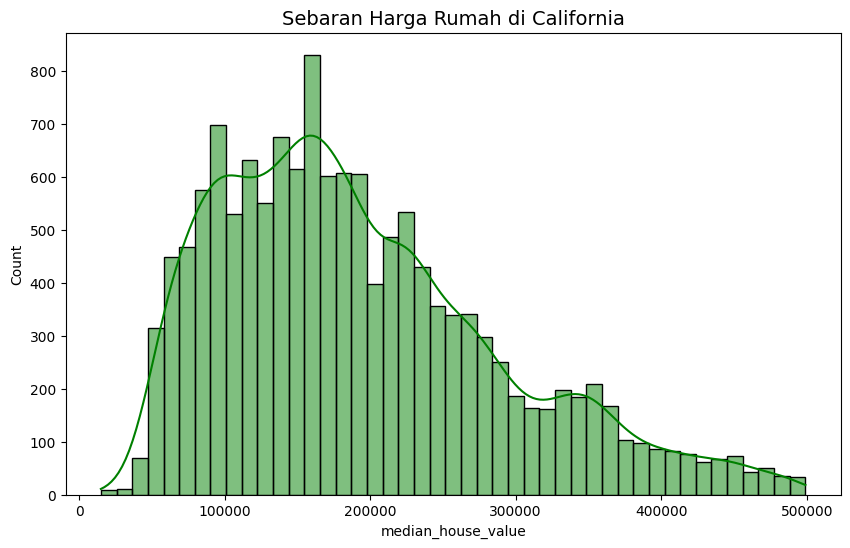

In [88]:
# Cek jumlah data sebelum dihapus
print(f"Jumlah baris awal: {len(df)}")

# Menghapus data dengan median_house_value >= 500,000 (karena ini angka batas atas / capped)
df_clean = df[df['median_house_value'] < 500000].copy()

# Cek jumlah data setelah penghapusan outlier
print(f"Jumlah baris setelah dibersihkan: {len(df_clean)}")

# Visualisasi setelah penghapusan outlier
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['median_house_value'], kde=True, color='green')
plt.title('Sebaran Harga Rumah di California', fontsize=14)
plt.show()

#### **d. Encoding Categorical Variables**
Mengubah fitur kategorikal `ocean_proximity` menjadi numerik menggunakan One-Hot Encoding.

In [89]:
df_clean = pd.get_dummies(df_clean, columns=['ocean_proximity'], drop_first=True)
df_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,47500.0,2.800000,0.250000,4.825000,True,False,False,False
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,100000.0,3.671480,0.322517,3.018051,False,False,True,False
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,285800.0,6.478022,0.167939,3.810440,False,False,False,False
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,175000.0,2.518000,0.474980,3.051000,False,False,False,False
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,59200.0,4.622754,0.251295,3.628743,True,False,False,False


#### **e. Train-Test Split**
Memisahkan data menjadi fitur (X) dan target (y), lalu membaginya menjadi set pelatihan (80%) dan pengujian (20%).

In [90]:
from sklearn.model_selection import train_test_split

# Definisi Fitur (X) dan Target (y)
X = df_clean.drop('median_house_value', axis=1)
y = df_clean['median_house_value']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)


X_train shape: (11001, 15)
X_test shape: (2751, 15)


### **4. Modeling (Pemodelan)**
Kita akan membandingkan dua algoritma: **Linear Regression** (sebagai baseline) dan **Random Forest Regressor** (model non-linear yang lebih kompleks).

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Inisialisasi Model
lin_reg = LinearRegression()
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Training Model Linear Regression
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Training Model Random Forest
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

### **5. Evaluasi Model (Evaluation)**
Membandingkan kinerja model menggunakan RMSE, MAE, dan MAPE.

In [92]:
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    
    print(f'--- {model_name} ---')
    print(f'RMSE: {rmse:.2f}')
    print(f'MAE: {mae:.2f}')
    print(f'MAPE: {mape:.2f}%')
    print(f'R2 Score: {r2:.2f}')
    print('')
    return [rmse, mae, mape, r2]

metrics_lin = evaluate_model(y_test, y_pred_lin, 'Linear Regression')
metrics_rf = evaluate_model(y_test, y_pred_rf, 'Random Forest')

--- Linear Regression ---
RMSE: 59917.02
MAE: 44469.95
MAPE: 27.50%
R2 Score: 0.62

--- Random Forest ---
RMSE: 47011.50
MAE: 31418.69
MAPE: 18.63%
R2 Score: 0.77



#### **Actual vs Predicted Plot**

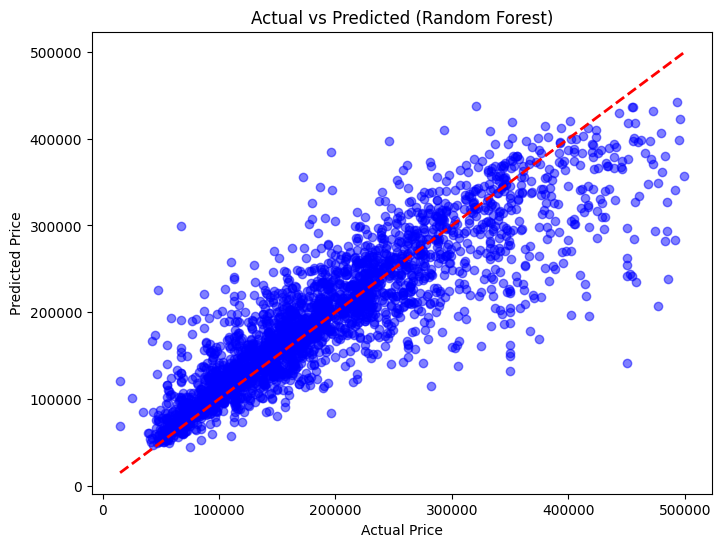

In [93]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted (Random Forest)')
plt.show()

### **6. Feature Importance Analysis**

Plot ini menunjukkan fitur mana yang paling berpengaruh terhadap prediksi model:
- **Y-axis (Features):** Nama fitur yang digunakan dalam model.
- **X-axis (Feature Importance Score):** Tingkat kontribusi fitur terhadap model. Semakin besar nilainya, semakin penting fitur tersebut dalam menentukan harga rumah.

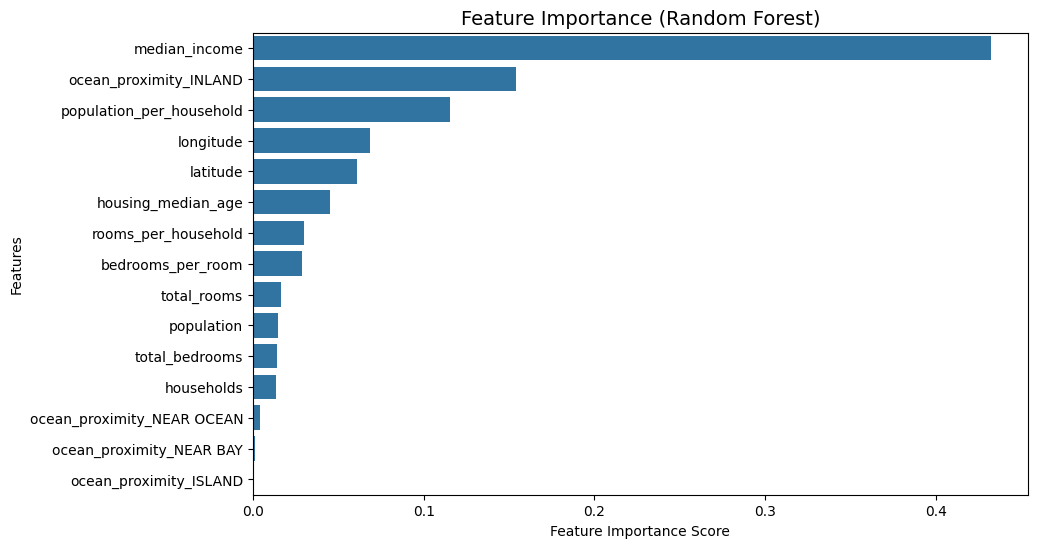

In [94]:
feature_importance = pd.Series(rf_reg.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance (Random Forest)', fontsize=14)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

### **7. Kesimpulan & Rekomendasi (Conclusion)**

**Kesimpulan:**
1.  **Dukungan Model:** Model **Random Forest** memberikan performa yang lebih baik dibandingkan Linear Regression. Hal ini dibuktikan dengan nilai error (RMSE, MAE, MAPE) yang lebih rendah serta nilai $R^2$ Score yang lebih tinggi.
2.  **Faktor Kunci:** Berdasarkan Feature Importance, `median_income` (pendapatan rata-rata) adalah faktor paling dominan dalam menentukan harga rumah, diikuti oleh lokasi (`ocean_proximity`).

**Rekomendasi Bisnis:**
1.  **Target Market:** Fokuskan pemasaran properti premium di area dengan pendapatan penduduk yang tinggi (`median_income` tinggi), karena ini adalah indikator utama harga.
2.  **Lokasi Strategis:** Properti yang dekat dengan laut (`ocean_proximity`) memiliki nilai jual lebih tinggi. Pengembang disarankan untuk memprioritaskan akuisisi lahan di area pesisir.
3.  **Renovasi Efektif:** Menambah fungsionalitas ruang (`rooms_per_household`) daripada sekadar menambah kamar tidur jika lahan terbatas, dapat meningkatkan nilai aset.

In [96]:
import pickle

# Simpan model Linear Regression
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(lin_reg, f)

# Simpan model Random Forest
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_reg, f)

print("Model berhasil disimpan sebagai pickle!")

Model berhasil disimpan sebagai pickle!
